In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [3]:
T1 = np.array([36.8 ,
35.0 ,
34.9 ,
33.2 ,
33.1 ,
31.5 ,
29.5 ,
27.8 ,
25.9 ,
25.4 ,
23.5 ,
22.0 ,
21.8 ,
20.9 ,
19.9 ,
])

AgCl = np.array([4.29 ,
4.22 ,
4.25 ,
4.15 ,
4.12 ,
4.03 ,
3.90 ,
3.75 ,
3.61 ,
3.59 ,
3.45 ,
3.32 ,
3.30 ,
3.23 ,
3.17 ,
])

AgCl = np.array([0.97214191, 1.03478376, 1.07215275, 1.09742561, 1.0747946 ,
       1.10269847, 1.1200783 , 1.09535116, 1.095362  , 1.11220696,
       1.11221781, 1.09275268, 1.08749066, 1.08381159, 1.09750151])
print((AgCl/(61.92+76.34)/10)**2)
AgCl = np.log(AgCl/(61.92+76.34)/1000)

T2 = np.array([20.0 ,
23.2 ,
24.0 ,
28.4 ,
33.3 ,
38.2 ,
])

H2O = np.array([2.09 ,
2.34 ,
2.38 ,
2.67 ,
2.99 ,
3.48 ,   
])

T1 = T1+273.15
T2 = T2+273.15

[4.94386073e-07 5.60152274e-07 6.01340179e-07 6.30023975e-07
 6.04307308e-07 6.36092740e-07 6.56301900e-07 6.27644373e-07
 6.27656796e-07 6.47110001e-07 6.47122627e-07 6.24670009e-07
 6.18668446e-07 6.14489515e-07 6.30111126e-07]


In [10]:
#直线拟合
def linear_func(X, A, B):
    return A*X + B

result = optimize.curve_fit(linear_func, 1/(T1[3:]), AgCl[3:])
print(result)

(array([ -9.79051908, -11.71107771]), array([[ 4.81093040e+03, -1.60745490e+01],
       [-1.60745490e+01,  5.37216261e-02]]))


In [11]:
A, B = result[0]
x1 = np.arange(1/(35+273.15), 1/(18+273.15), 32**(-3))
y1 = A*x1 + B
print(A, B)

-9.790519081184575 -11.71107771387298


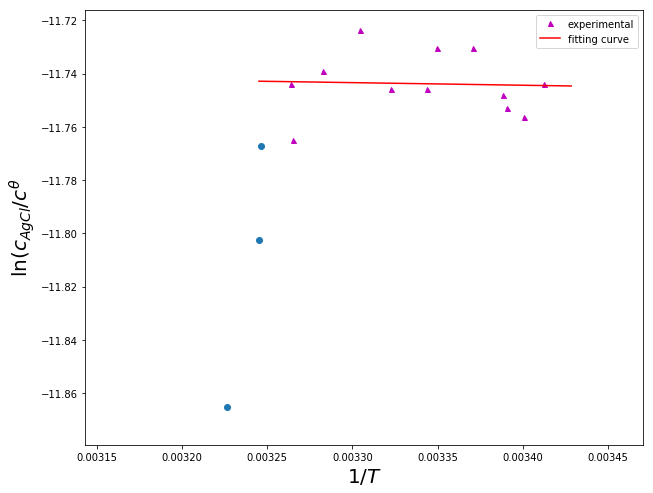

In [14]:
## plot
plt.figure(figsize=(10, 8))
plt.scatter(1/(T1[:3]), AgCl[:3])
plt.plot(1/(T1[3:]), AgCl[3:], 'm^', markersize = 5.0, label = 'experimental')
plt.plot(x1, y1, "-r", label = 'fitting curve')
plt.legend()
plt.xlim([1/(45+273.15), 1/(15+273.15)])
plt.xlabel(r'$1/T$', fontsize = 20)
plt.ylabel(r'$\ln(c_{AgCl}/c^{\theta}$', fontsize = 20)
plt.savefig(r'C:\Users\xym\Desktop\experiment.png', dpi = 600)
plt.show()

In [16]:
## R^2
def R_squared(Y, Y_hat):
    y_bar = np.mean(Y)
    SSR = np.sum(np.square(Y_hat - y_bar))
    SST = np.sum(np.square(Y - y_bar))
    return SSR/SST

In [17]:
Y_hat = A*(1/(T1[:6]))+B
print(R_squared(AgCl[:6], Y_hat))

0.8027775342748037
